Games 

In [1]:
# nltk (Natural Language Toolkit).
# .json
# pandas (para el manejo de datos tabulares).
# ast (para evaluar literales en línea).

# Importar las bibliotecas necesarias
import nltk          # Biblioteca de herramientas de procesamiento de lenguaje natural.
import json          # Biblioteca para trabajar con archivos JSON.
import pandas as pd   # Biblioteca para el manejo eficiente de datos tabulares.
import ast           # Biblioteca para evaluar literales en línea.
import matplotlib.pyplot as plt  # Biblioteca para la creación de gráficos.


In [2]:
# Nombre del archivo JSON que deseas abrir
# Modifica la ruta según la estructura de tus directorios.
archivo_json = r'D:\Curso Henry\PI\output_steam_games.json'

# Lista para almacenar los datos del archivo JSON
data = []

# Usando la biblioteca json con especificación de codificación UTF-8
with open(archivo_json, 'r', encoding='utf-8') as archivo:
    for line in archivo:
        try:
            # Cargar cada línea como un objeto JSON válido
            obj = json.loads(line)
            data.append(obj)
        except json.JSONDecodeError as e:
            print(f"Error al cargar la línea: {e}")

# Crear un DataFrame a partir de los datos
df_output_steam_games = pd.DataFrame(data)

# Mostrar el DataFrame
print(df_output_steam_games)
df_output_steam_games


              publisher                                 genres  \
0                   NaN                                    NaN   
1                   NaN                                    NaN   
2                   NaN                                    NaN   
3                   NaN                                    NaN   
4                   NaN                                    NaN   
...                 ...                                    ...   
120440  Ghost_RUS Games  [Casual, Indie, Simulation, Strategy]   
120441           Sacada              [Casual, Indie, Strategy]   
120442     Laush Studio            [Indie, Racing, Simulation]   
120443         SIXNAILS                        [Casual, Indie]   
120444              NaN                                    NaN   

                        app_name                     title  \
0                            NaN                       NaN   
1                            NaN                       NaN   
2                    

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,False,773640,"Nikita ""Ghost_RUS"""
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,False,733530,Sacada
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,Laush Dmitriy Sergeevich
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,False,658870,"xropi,stev3ns"


In [3]:
df_games = df_output_steam_games

In [4]:
# Cantidad de valores nulos (NaN) en el DataFrame
nulos = df_games.isna().sum().sum()

# Cantidad de valores repetidos en la columna 'id'
repetidos = df_games['id'].duplicated().sum()

# Cantidad de celdas vacías en el DataFrame (contando ceros como celdas vacías)
celdas_vacias = (df_games == '').sum().sum() + (df_games.eq(0)).sum().sum()

print("Cantidad de valores nulos (NaN):", nulos)
print("Cantidad de valores repetidos en la columna 'id':", repetidos)
print("Cantidad de celdas vacías:", celdas_vacias)

Cantidad de valores nulos (NaN): 1168997
Cantidad de valores repetidos en la columna 'id': 88312
Cantidad de celdas vacías: 30188


In [5]:

# Encuentra los "id" repetidos y cuántas veces se repiten
id_repetidos = df_output_steam_games['id'][df_output_steam_games['id'].duplicated(keep=False)]
conteo_repeticiones = id_repetidos.value_counts()

# Filtra los "id" repetidos que se repiten al menos dos veces
id_repetidos = conteo_repeticiones[conteo_repeticiones >= 2].index

# Imprime los "id" repetidos y cuántas veces se repiten
print("ID repetidos y su frecuencia de repetición:")
print(conteo_repeticiones)


ID repetidos y su frecuencia de repetición:
id
612880    2
Name: count, dtype: int64


In [6]:
# Identificar los "id" repetidos
ids_repetidos = df_output_steam_games[df_output_steam_games['id'].duplicated(keep=False)]

# Filtrar dos filas con el mismo "user_id"
id_ejemplo = '612880'  # "id" a investigar

# Filtrar las filas correspondientes a un "user_id" específico
filas_id_ejemplo = df_output_steam_games[df_output_steam_games['id'] == id_ejemplo]

# Mostrar las filas para inspección
print(filas_id_ejemplo)

                 publisher    genres                          app_name  \
102204  Bethesda Softworks  [Action]  Wolfenstein II: The New Colossus   
102883  Bethesda Softworks  [Action]  Wolfenstein II: The New Colossus   

                                   title  \
102204  Wolfenstein II: The New Colossus   
102883  Wolfenstein II: The New Colossus   

                                                      url release_date  \
102204          http://store.steampowered.com/app/612880/   2017-10-26   
102883  http://store.steampowered.com/app/612880/Wolfe...   2017-10-26   

                                                     tags  \
102204  [Action, FPS, Gore, Violent, Alternate History...   
102883  [Action, FPS, Gore, Violent, Alternate History...   

                                              reviews_url  \
102204  http://steamcommunity.com/app/612880/reviews/?...   
102883  http://steamcommunity.com/app/612880/reviews/?...   

                                                    s

In [7]:

# Eliminar filas con "id" repetidos y mantener la primera aparición
df_sin_repetidos = df_output_steam_games.drop_duplicates(subset='id', keep='first')

# Imprimir el DataFrame resultante
print(df_sin_repetidos)


               publisher                                             genres  \
0                    NaN                                                NaN   
88310          Kotoshiro      [Action, Casual, Indie, Simulation, Strategy]   
88311   Making Fun, Inc.               [Free to Play, Indie, RPG, Strategy]   
88312       Poolians.com  [Casual, Free to Play, Indie, Simulation, Sports]   
88313               彼岸领域                        [Action, Adventure, Casual]   
...                  ...                                                ...   
120440   Ghost_RUS Games              [Casual, Indie, Simulation, Strategy]   
120441            Sacada                          [Casual, Indie, Strategy]   
120442      Laush Studio                        [Indie, Racing, Simulation]   
120443          SIXNAILS                                    [Casual, Indie]   
120444               NaN                                                NaN   

                        app_name                   

In [8]:
df_output_steam_games = df_sin_repetidos

In [9]:

# Encuentra los "id" repetidos y cuántas veces se repiten
id_repetidos = df_output_steam_games['id'][df_output_steam_games['id'].duplicated(keep=False)]
conteo_repeticiones = id_repetidos.value_counts()

# Filtra los "id" repetidos que se repiten al menos dos veces
id_repetidos = conteo_repeticiones[conteo_repeticiones >= 2].index

# Imprime los "id" repetidos y cuántas veces se repiten
print("ID repetidos y su frecuencia de repetición:")
print(conteo_repeticiones)

ID repetidos y su frecuencia de repetición:
Series([], Name: count, dtype: int64)


In [10]:
df_output_steam_games.columns

Index(['publisher', 'genres', 'app_name', 'title', 'url', 'release_date',
       'tags', 'reviews_url', 'specs', 'price', 'early_access', 'id',
       'developer'],
      dtype='object')

In [11]:
print(df_output_steam_games[['publisher', 'genres', 'app_name', 'title', 'url', 'release_date','tags', 'reviews_url', 'specs', 'price', 'early_access', 'id','developer']].all(axis=0))


publisher        True
genres           True
app_name         True
title            True
url              True
release_date     True
tags             True
reviews_url      True
specs            True
price            True
early_access    False
id               True
developer        True
dtype: bool


In [12]:
# Contar valores nulos (NaN) en la columna 'early_access'
nulos = df_output_steam_games['early_access'].isnull().sum()

# Contar valores iguales a cero en la columna 'early_access'
ceros = (df_output_steam_games['early_access'] == 0).sum()

print(f"Valores nulos (NaN) en 'early_access': {nulos}")
print(f"Valores iguales a cero en 'early_access': {ceros}")


Valores nulos (NaN) en 'early_access': 1
Valores iguales a cero en 'early_access': 30185


In [13]:
# Imprimir la columna 'early_access'
print(df_output_steam_games['early_access'])


0           NaN
88310     False
88311     False
88312     False
88313     False
          ...  
120440    False
120441    False
120442    False
120443    False
120444     True
Name: early_access, Length: 32133, dtype: object


In [14]:

# Contar valores False en la columna 'early_access'
valores_false = (df_output_steam_games['early_access'] == False).sum()

# Calcular el porcentaje en relación a datos reales
total_datos_reales = len(df_output_steam_games) - df_output_steam_games['early_access'].isnull().sum()
porcentaje_false_respecto_a_reales = (valores_false / total_datos_reales) * 100

# Imprimir el resultado
print(f"Porcentaje de valores 'False' en 'early_access' en relación a datos reales: {porcentaje_false_respecto_a_reales:.2f}%")

Porcentaje de valores 'False' en 'early_access' en relación a datos reales: 93.94%


In [15]:
# Eliminar la columna 'early_access' del DataFrame
df_output_steam_games.drop(columns=['early_access'], inplace=True)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_16472\3070199489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_output_steam_games.drop(columns=['early_access'], inplace=True)


In [16]:
df_output_steam_games.columns

Index(['publisher', 'genres', 'app_name', 'title', 'url', 'release_date',
       'tags', 'reviews_url', 'specs', 'price', 'id', 'developer'],
      dtype='object')

In [17]:
print(df_output_steam_games[['publisher', 'genres', 'app_name', 'title', 'url', 'release_date','tags', 'reviews_url', 'specs', 'price', 'id', 'developer']].all(axis=0))


publisher       True
genres          True
app_name        True
title           True
url             True
release_date    True
tags            True
reviews_url     True
specs           True
price           True
id              True
developer       True
dtype: bool


In [18]:
# Cantidad de valores nulos (NaN) en el DataFrame
nulos = df_output_steam_games.isna().sum().sum()

# Cantidad de celdas vacías en el DataFrame (contando ceros como celdas vacías)
celdas_vacias = (df_output_steam_games == '').sum().sum() + (df_output_steam_games.eq(0)).sum().sum()

print("Cantidad de valores nulos (NaN):", nulos)
print("Cantidad de celdas vacías:", celdas_vacias)


Cantidad de valores nulos (NaN): 20967
Cantidad de celdas vacías: 0


In [19]:
# Cantidad de valores NaN por fila
nulos_por_fila = df_output_steam_games.isna().sum(axis=1)

# Imprimir la cantidad de NaN por fila
print("Cantidad de NaN por fila:")
print(nulos_por_fila)


Cantidad de NaN por fila:
0         12
88310      0
88311      0
88312      0
88313      0
          ..
120440     0
120441     0
120442     0
120443     0
120444     5
Length: 32133, dtype: int64




1. **'id'**:  'id' es una columna clave para identificar y relacionar las entradas en tu DataFrame. Esto asegurará que no haya entradas incompletas en términos de identificación.

2. **'app_name' y 'title'**: Estas columnas suelen ser importantes para describir las aplicaciones o juegos, por lo que si alguna de ellas tiene un valor NaN, podría ser una señal de que los datos no están completos.

3. **'release_date'**: La fecha de lanzamiento es una información clave. Si tienes filas con NaN en esta columna, podría indicar que la fecha de lanzamiento no está disponible.

4. **'developer' y 'publisher'**: Si deseas realizar análisis basados en los desarrolladores o editores de las aplicaciones o juegos, puedes eliminar filas con NaN en estas columnas si no puedes imputar los valores faltantes.

In [20]:
# Eliminar filas con NaN en cualquiera de las cuatro columnas especificadas
df_output_steam_games = df_output_steam_games.dropna(subset=['id', 'app_name', 'title', 'release_date'], how='any')


In [21]:
# Cantidad de valores nulos (NaN) en el DataFrame
nulos = df_output_steam_games.isna().sum().sum()

print("Cantidad de valores nulos (NaN):", nulos)


Cantidad de valores nulos (NaN): 10560


In [22]:
# Cantidad de valores NaN por fila
nulos_por_fila = df_output_steam_games.isna().sum(axis=1)

# Imprimir la cantidad de NaN por fila
print("Cantidad de NaN por fila:")
print(nulos_por_fila)

Cantidad de NaN por fila:
88310     0
88311     0
88312     0
88313     0
88315     0
         ..
120439    0
120440    0
120441    0
120442    0
120443    0
Length: 30065, dtype: int64


In [23]:
df_output_steam_games.columns

Index(['publisher', 'genres', 'app_name', 'title', 'url', 'release_date',
       'tags', 'reviews_url', 'specs', 'price', 'id', 'developer'],
      dtype='object')

In [24]:
# Convertir la columna 'price' a formato numérico, ignorando los errores
df_output_steam_games['price'] = pd.to_numeric(df_output_steam_games['price'], errors='coerce')

# Calcular estadísticas de la columna 'price'
minimo = df_output_steam_games['price'].min()
maximo = df_output_steam_games['price'].max()
cuartiles = df_output_steam_games['price'].quantile([0.25, 0.5, 0.75])
media = df_output_steam_games['price'].mean()
desviacion_estandar = df_output_steam_games['price'].std()

# Imprimir las estadísticas
print(f"Valor Mínimo: {minimo}")
print(f"Valor Máximo: {maximo}")
print(f"Cuartil 25% (Q1): {cuartiles[0.25]}")
print(f"Cuartil 50% (Q2): {cuartiles[0.5]}")
print(f"Cuartil 75% (Q3): {cuartiles[0.75]}")
print(f"Media: {media}")
print(f"Desviación Estándar: {desviacion_estandar}")


Valor Mínimo: 0.49
Valor Máximo: 995.0
Cuartil 25% (Q1): 2.99
Cuartil 50% (Q2): 4.99
Cuartil 75% (Q3): 9.99
Media: 9.365512114537445
Desviación Estándar: 16.45927747131646


C:\Users\ASUS\AppData\Local\Temp\ipykernel_16472\3124677578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_output_steam_games['price'] = pd.to_numeric(df_output_steam_games['price'], errors='coerce')


In [25]:
# Calcular los cuartiles para la columna 'price'
Q1 = df_output_steam_games['price'].quantile(0.25)
Q3 = df_output_steam_games['price'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Límites para identificar valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar valores atípicos
df_outliers = df_output_steam_games[(df_output_steam_games['price'] < limite_inferior) | (df_output_steam_games['price'] > limite_superior)]

# Cantidad de outliers antes del filtrado
cantidad_outliers = len(df_outliers)

# Total de filas en el DataFrame original
total_filas = len(df_output_steam_games)

# Porcentaje de outliers en la muestra
porcentaje_outliers = (cantidad_outliers / total_filas) * 100

# Imprimir los resultados
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Límite Inferior: {limite_inferior}")
print(f"Límite Superior: {limite_superior}")
print(f"Cantidad de outliers antes del filtrado: {cantidad_outliers}")
print(f"Porcentaje de outliers en la muestra: {porcentaje_outliers:.2f}%")


Q1: 2.99
Q3: 9.99
IQR: 7.0
Límite Inferior: -7.51
Límite Superior: 20.490000000000002
Cantidad de outliers antes del filtrado: 1767
Porcentaje de outliers en la muestra: 5.88%


In [26]:
df_output_steam_games = df_outliers

In [27]:
df_output_steam_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1767 entries, 88318 to 120408
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     1504 non-null   object 
 1   genres        1753 non-null   object 
 2   app_name      1767 non-null   object 
 3   title         1767 non-null   object 
 4   url           1767 non-null   object 
 5   release_date  1767 non-null   object 
 6   tags          1764 non-null   object 
 7   reviews_url   1767 non-null   object 
 8   specs         1624 non-null   object 
 9   price         1767 non-null   float64
 10  id            1767 non-null   object 
 11  developer     1746 non-null   object 
dtypes: float64(1), object(11)
memory usage: 179.5+ KB


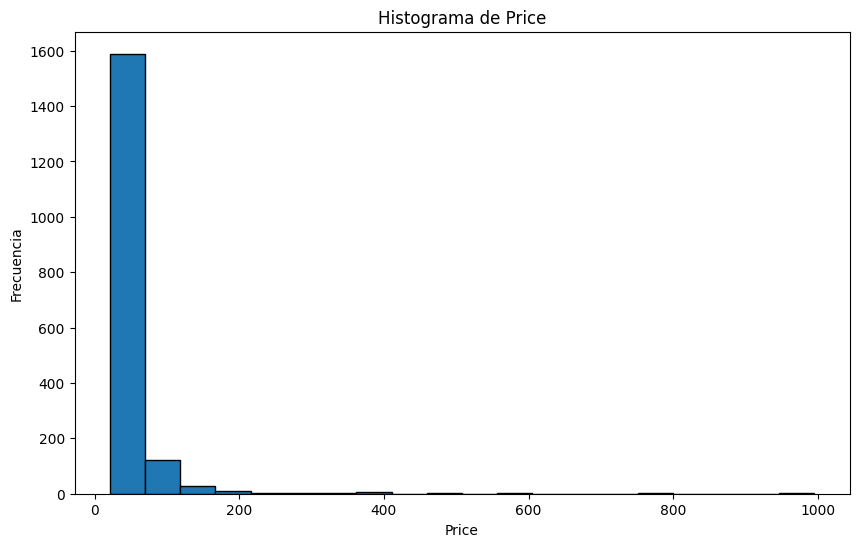

In [28]:
import matplotlib.pyplot as plt

# Crear un histograma para la columna 'price'
plt.figure(figsize=(10, 6))
plt.hist(df_output_steam_games['price'], bins=20, edgecolor='k')
plt.title('Histograma de Price')
plt.xlabel('Price')
plt.ylabel('Frecuencia')
plt.show()

In [29]:
# Comprobar si hay valores NaN en la columna 'price'
valores_nan_price = df_output_steam_games['price'].isna().any()

if valores_nan_price:
    print("Sí, hay valores NaN en la columna 'price'.")
else:
    print("No, no hay valores NaN en la columna 'price'.")

No, no hay valores NaN en la columna 'price'.


In [30]:
df_output_steam_games

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,id,developer
88318,Poppermost Productions,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Legend Pass,SNOW - All Access Legend Pass,http://store.steampowered.com/app/774278/SNOW_...,2018-01-04,"[Free to Play, Indie, Simulation, Sports]",http://steamcommunity.com/app/774278/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",29.99,774278,Poppermost Productions
88328,Poppermost Productions,"[Free to Play, Indie, Simulation, Sports]",SNOW - Lifetime Pack,SNOW - Lifetime Pack,http://store.steampowered.com/app/774279/SNOW_...,2018-01-03,"[Free to Play, Indie, Simulation, Sports]",http://steamcommunity.com/app/774279/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",59.99,774279,Poppermost Productions
88369,SimBin,[Racing],RACE - The WTCC Game,RACE - The WTCC Game,http://store.steampowered.com/app/4230/RACE__T...,2006-11-24,"[Racing, Simulation]",http://steamcommunity.com/app/4230/reviews/?br...,"[Single-player, Multi-player]",39.99,4230,SimBin
88544,NCsoft,"[Massively Multiplayer, RPG]",Guild Wars Trilogy,Guild Wars Trilogy,http://store.steampowered.com/app/29570/Guild_...,2008-09-25,"[RPG, Massively Multiplayer, MMORPG, PvP]",http://steamcommunity.com/app/29570/reviews/?b...,"[Multi-player, MMO]",29.99,29570,ArenaNet®
88622,Dovetail Games - Trains,[Simulation],Train Simulator: Colton & Northern Route Add-On,Train Simulator: Colton &amp; Northern Route A...,http://store.steampowered.com/app/24029/Train_...,2009-09-25,"[Simulation, Trains, Co-op, Open World, Sandbo...",http://steamcommunity.com/app/24029/reviews/?b...,"[Single-player, Downloadable Content]",24.99,24029,All Aboard
...,...,...,...,...,...,...,...,...,...,...,...,...
120229,NaN,"[Animation &amp; Modeling, Design &amp; Illust...",Radius-Wing SHMUP 3d Models,Radius-Wing SHMUP 3d Models,http://store.steampowered.com/app/774931/Radiu...,2017-12-29,"[Design & Illustration, Utilities, Animation &...",http://steamcommunity.com/app/774931/reviews/?...,[Downloadable Content],24.99,774931,BrashMonkey
120248,Firedog Creative Company Limited,"[RPG, Simulation]",愛神餐館2,愛神餐館2,http://store.steampowered.com/app/769680/2/,2017-12-29,"[RPG, Simulation, Anime]",http://steamcommunity.com/app/769680/reviews/?...,[Single-player],34.99,769680,Firedog Creative Company Limited
120269,CarX Technologies,"[Massively Multiplayer, Racing, Simulation, Sp...",CarX Drift Racing Online - Deluxe,CarX Drift Racing Online - Deluxe,http://store.steampowered.com/app/776950/CarX_...,2017-12-28,"[Massively Multiplayer, Simulation, Racing, Sp...",http://steamcommunity.com/app/776950/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",29.99,776950,CarX Technologies
120380,DreamInCode B.V.,"[Action, Adventure, Casual, Indie, Simulation,...",Mesozoica,Mesozoica,http://store.steampowered.com/app/719590/Mesoz...,2018-01-02,"[Early Access, Simulation, Strategy, Casual, I...",http://steamcommunity.com/app/719590/reviews/?...,[Single-player],29.99,719590,"DreamInCode B.V.,Squadron Interactive"


In [31]:
# Elimina las columnas especificadas del DataFrame
df_output_steam_games = df_output_steam_games.drop(['tags', 'specs', 'url', 'reviews_url'], axis=1)

# Imprime las columnas después de la eliminación
print(df_output_steam_games.columns)


Index(['publisher', 'genres', 'app_name', 'title', 'release_date', 'price',
       'id', 'developer'],
      dtype='object')


In [32]:
df_output_steam_games

,publisher,genres,app_name,title,release_date,price,id,developer
88318,Poppermost Productions,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Legend Pass,SNOW - All Access Legend Pass,2018-01-04,29.99,774278,Poppermost Productions
88328,Poppermost Productions,"[Free to Play, Indie, Simulation, Sports]",SNOW - Lifetime Pack,SNOW - Lifetime Pack,2018-01-03,59.99,774279,Poppermost Productions
88369,SimBin,[Racing],RACE - The WTCC Game,RACE - The WTCC Game,2006-11-24,39.99,4230,SimBin
88544,NCsoft,"[Massively Multiplayer, RPG]",Guild Wars Trilogy,Guild Wars Trilogy,2008-09-25,29.99,29570,ArenaNet®
88622,Dovetail Games - Trains,[Simulation],Train Simulator: Colton & Northern Route Add-On,Train Simulator: Colton &amp; Northern Route A...,2009-09-25,24.99,24029,All Aboard
...,...,...,...,...,...,...,...,...
120229,NaN,"[Animation &amp; Modeling, Design &amp; Illust...",Radius-Wing SHMUP 3d Models,Radius-Wing SHMUP 3d Models,2017-12-29,24.99,774931,BrashMonkey
120248,Firedog Creative Company Limited,"[RPG, Simulation]",愛神餐館2,愛神餐館2,2017-12-29,34.99,769680,Firedog Creative Company Limited
120269,CarX Technologies,"[Massively Multiplayer, Racing, Simulation, Sp...",CarX Drift Racing Online - Deluxe,CarX Drift Racing Online - Deluxe,2017-12-28,29.99,776950,CarX Technologies
120380,DreamInCode B.V.,"[Action, Adventure, Casual, Indie, Simulation,...",Mesozoica,Mesozoica,2018-01-02,29.99,719590,"DreamInCode B.V.,Squadron Interactive"


In [33]:
# Suponiendo que df_output_steam_games es tu DataFrame
# Crear una nueva columna 'release_year' con el año de lanzamiento o "Dato no disponible" si no hay fecha
df_output_steam_games['release_year'] = pd.to_datetime(df_output_steam_games['release_date'], errors='coerce').dt.year
df_output_steam_games['release_year'] = df_output_steam_games['release_year'].fillna('Dato no disponible')

# Convertir a int solo para los valores numéricos, mantener 'Dato no disponible' como str
df_output_steam_games['release_year'] = df_output_steam_games['release_year'].apply(lambda x: int(x) if pd.notnull(x) and x != 'Dato no disponible' else x)

# Eliminar la columna 'release_date'
df_output_steam_games = df_output_steam_games.drop('release_date', axis=1)

In [34]:
df_output_steam_games

,publisher,genres,app_name,title,price,id,developer,release_year
88318,Poppermost Productions,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Legend Pass,SNOW - All Access Legend Pass,29.99,774278,Poppermost Productions,2018
88328,Poppermost Productions,"[Free to Play, Indie, Simulation, Sports]",SNOW - Lifetime Pack,SNOW - Lifetime Pack,59.99,774279,Poppermost Productions,2018
88369,SimBin,[Racing],RACE - The WTCC Game,RACE - The WTCC Game,39.99,4230,SimBin,2006
88544,NCsoft,"[Massively Multiplayer, RPG]",Guild Wars Trilogy,Guild Wars Trilogy,29.99,29570,ArenaNet®,2008
88622,Dovetail Games - Trains,[Simulation],Train Simulator: Colton & Northern Route Add-On,Train Simulator: Colton &amp; Northern Route A...,24.99,24029,All Aboard,2009
...,...,...,...,...,...,...,...,...
120229,NaN,"[Animation &amp; Modeling, Design &amp; Illust...",Radius-Wing SHMUP 3d Models,Radius-Wing SHMUP 3d Models,24.99,774931,BrashMonkey,2017
120248,Firedog Creative Company Limited,"[RPG, Simulation]",愛神餐館2,愛神餐館2,34.99,769680,Firedog Creative Company Limited,2017
120269,CarX Technologies,"[Massively Multiplayer, Racing, Simulation, Sp...",CarX Drift Racing Online - Deluxe,CarX Drift Racing Online - Deluxe,29.99,776950,CarX Technologies,2017
120380,DreamInCode B.V.,"[Action, Adventure, Casual, Indie, Simulation,...",Mesozoica,Mesozoica,29.99,719590,"DreamInCode B.V.,Squadron Interactive",2018


In [37]:

# Guardar el DataFrame en un archivo CSV llamado 'nombre_archivo.csv'
df_output_steam_games.to_csv('df_output_steam_games.csv', index=False)